___
<a href='http://www.pucminas.br/Pos-Graduacao/Paginas/default.aspx'> <img src='assets/puc-logo.png' /></a>
___

## Disciplina : Introdução às Linguagens Estatísticas     
** Professor: Raphael Rodrigues Campos **

** Aluno: Antonio Carneiro de Albuquerque Netto **

** Matrícula: 83026 **
<center><h1>Trabalho Prático</h1></center>

### Imports e header da aplicação

In [67]:
import json
import string
import pandas as pd
import numpy as np
from pprint import pprint
from itertools import groupby

pandasDF = pd.read_json('perfis.json')
pandasDF.head()

,education,experiences,gender,languages,skills
0,"[{u'date': u'2016 – 2016', u'school': u'Stanfo...","[{u'date': u'set de 2011 – o momento', u'posit...",MALE,"[{u'proficiency': u'Nível avançado', u'name': ...","[{u'endorsement_count': u'+ de 99', u'name': u..."
1,"[{u'date': u'2015 – 2015', u'school': u'Centro...","[{u'date': u'jul de 2017 – o momento', u'posit...",FEMALE,"[{u'name': u'Idioma Inglês'}, {u'name': u'Idio...","[{u'endorsement_count': u'45', u'name': u'Plan..."
2,"[{u'date': u'2016 – 2019', u'school': u'Univer...","[{u'date': u'jul de 2017 – o momento', u'posit...",MALE,"[{u'proficiency': u'Nível avançado', u'name': ...","[{u'endorsement_count': u'8', u'name': u'JavaS..."
3,"[{u'date': u'2014 – 2019', u'school': u'Centro...","[{u'date': u'ago de 2017 – o momento', u'posit...",FEMALE,[{u'proficiency': u'Nível básico a intermediár...,"[{u'endorsement_count': u'2', u'name': u'Net P..."
4,"[{u'date': u'2011 – 2016', u'school': u'Univer...","[{u'date': u'mar de 2017 – o momento', u'posit...",MALE,"[{u'proficiency': u'Fluente ou nativo', u'name...","[{u'endorsement_count': u'13', u'name': u'Micr..."


### Leitura e criação dos DataFrames

**Função Auxiliar para montagem das tabelas e tratamento de valores desnecessários em algumas colunas**

In [68]:
## Func Aux
def setupTable(myColumn):
    
    is_list = myColumn.apply(lambda x: isinstance(x, list))
    only_lists = myColumn[is_list]
    
    ## Tratamento na Languages
    if myColumn.name == 'languages':
        for personLangs in only_lists:
            for lang in personLangs:
                if 'name' in lang:
                    lang['name'] = lang['name'].replace('Idioma\n','')
                    if lang['name'].encode('utf-8').find('Português') != -1 or lang['name'].encode('utf-8').find('Portuguese') != -1 or lang['name'].encode('utf-8').find('Portugais') != -1:
                        lang['name'] = 'PT'
                    if lang['name'].encode('utf-8').find('Inglês') != -1 or lang['name'].encode('utf-8').find('English') != -1 or lang['name'].encode('utf-8').find('Anglais') != -1:
                        lang['name'] = 'EN'
                    if lang['name'].encode('utf-8').find('Espanhol') != -1 or lang['name'].encode('utf-8').find('Spanish') != -1:
                        lang['name'] = 'ES'
                    if lang['name'].encode('utf-8').find('Italiano') != -1 or lang['name'].encode('utf-8').find('Italian') != -1:
                        lang['name'] = 'IT'
                    if lang['name'].encode('utf-8').find('Francês') != -1 or lang['name'].encode('utf-8').find('French') != -1 or lang['name'].encode('utf-8').find('Français') != -1:
                        lang['name'] = 'FR'
                    if lang['name'].encode('utf-8').find('Japonês') != -1:
                        lang['name'] = 'JP'
                    if lang['name'].encode('utf-8').find('Alemão') != -1:
                        lang['name'] = 'GE'
                    if lang['name'].encode('utf-8').find('Holandês') != -1:
                        lang['name'] = 'NE'
                    if lang['name'].encode('utf-8').find('Árabe') != -1:
                        lang['name'] = 'AR'
                    
                if 'proficiency' in lang:
                    proficiency = lang['proficiency'].encode('utf-8')
                    lang['proficiency'] = proficiency.replace('N\xc3\xadvel ','')
    
    ## Tratamento na Education
    if myColumn.name == 'education':
        for personEducation in only_lists:
            for eduItem in personEducation:
                ## Removendo parte desnecessária da string degree e major
                if 'degree' in eduItem:
                    degreeName = eduItem['degree'].replace('Nome do diploma\n','')
                    eduItem['degree'] = degreeName
                if 'major' in eduItem:
                    majorName = eduItem['major'].encode('utf-8').replace('Área de estudo\n','')
                    eduItem['major'] = majorName
    
    #return only_lists[0]
    df = pd.DataFrame.from_dict(only_lists.sum())
    df['personId'] = np.repeat(only_lists.index,
                                   only_lists.apply(lambda x: len(x)))
    return df

### Tabela de Languages

In [69]:
## LANG table
langDF = setupTable(pandasDF.languages)
langDF

,name,proficiency,personId
0,ES,avançado,0
1,EN,Fluente ou nativo,0
2,PT,Fluente ou nativo,0
3,EN,NaN,1
4,IT,NaN,1
5,EN,avançado,2
6,PT,Fluente ou nativo,2
7,ES,básico a intermediário,3
8,EN,avançado,3
9,PT,Fluente ou nativo,3


In [91]:
totalPersonsForLang = langDF.groupby('name')['personId'].agg(['count'])
totalPersonsForLang
# langNameUnique = langDF.name.unique()
# langNameUnique
#langDF.proficiency.astype(float).fillna(0.0)
#
# langDF.astype(float).groupby('name').proficiency.mean()

,count
name,
AR,1
EN,85
ES,39
FR,11
GE,2
IT,3
JP,1
LIBRAS,1
NE,1


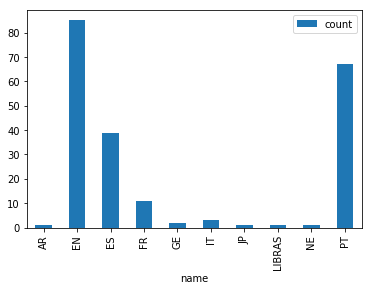

In [90]:
%matplotlib inline
totalPersonsForLang.plot(kind='bar')

### Tabela de Experiences

In [93]:
## EXP table
expDF = setupTable(pandasDF.experiences)
expDF

,company,date,location,position,personId
0,Trojan Technologies,set de 2011 – o momento,"Belo Horizonte e Região, Brasil",CEO and Founder,0
1,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,0
5,NaN,NaN,NaN,NaN,0
6,Any Company,mar de 2016 – o momento,NaN,Endeavor Entrepreneur,0
7,Any Company,out de 2015 – o momento,"Belo Horizonte e Região, Brasil",Investor and Board Member,0
8,Any Company,out de 2012 – mai de 2013,"Santiago, Chile",Start-Up Chile Entrepreneur,0
9,Any Company,set de 2009 – jan de 2011,"São Paulo e Região, Brasil",Founder and Sales Director,0


In [94]:
totalPersonsInPosition = expDF.groupby('position')['personId'].agg(['count'])
totalPersonsInPosition

,count
position,
Account Executive,1
Account Manager,1
Administrador de clínica médica,1
Advisor to the Presidency,1
Agente Censitário Municipal,1
Agente Comercial,1
Aluno do projeto Bepid,1
Analista Comercial,1
Analista Desenvolvedor,1


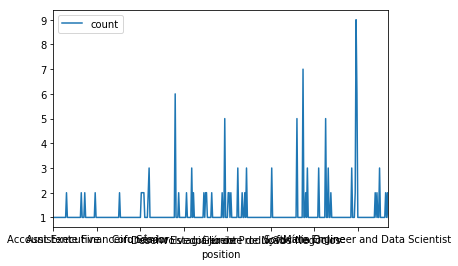

In [118]:
%matplotlib inline
totalPersonsInPosition.plot(kind='line')

In [101]:
totalPersonsPerLocation = expDF.groupby('location')['personId'].agg(['count'])
totalPersonsPerLocation

,count
location,
,1
1 Bootcamp Gama Academy - Belo Horizonte,1
"Alphaville-Barueri,SP",1
Alphaville-Barueri-SP,1
Alvorada,1
"Amesterdã e Região, Holanda",1
"Aulnoye-Aymeries, France",1
"Av. Brasil, Nº 2971 - Compensa - Cep – 69036-110",1
"Av. Efigênio Salles, 1155 - Aleixo, Manaus - AM, 69057-050",1


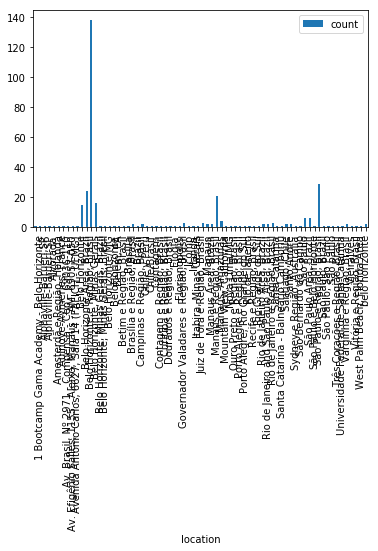

In [116]:
%matplotlib inline
totalPersonsPerLocation.plot(kind='bar')

### Tabela de Skills

In [121]:
## Skills table
skillDF = setupTable(pandasDF.skills)
skillDF

,endorsement_count,name,personId
0,+ de 99,Empresas startups,0
1,NaN,NaN,0
2,NaN,NaN,0
3,+ de 99,Empreendedorismo,0
4,NaN,NaN,0
5,NaN,NaN,0
6,97,Start-ups,0
7,NaN,NaN,0
8,NaN,NaN,0
9,73,Entrepreneurship,0


In [122]:
totalPersonsPerSkill = skillDF.groupby('name')['personId'].agg(['count'])
totalPersonsPerSkill

,count
name,
.NET,1
.NET Framework,1
5S,1
A/B Testing,1
AJAX,4
AMP,1
ASP.NET,1
AWS,1
Accessibility,2


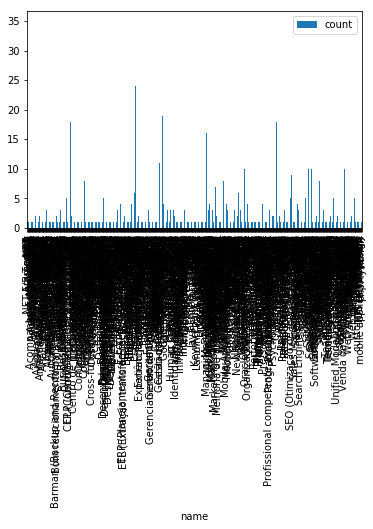

In [123]:
%matplotlib inline
totalPersonsPerSkill.plot(kind='bar')

### Tabela de Education

In [124]:
## Education table
eduDF = setupTable(pandasDF.education)
eduDF

,date,degree,major,school,personId
0,2016 – 2016,"Executive Education, Innovation & Entrepreneur...",NaN,Stanford University,0
1,2007 – 2010,Economics,Economics,Universidade Federal de Minas Gerais,0
2,2015 – 2015,Master of Business Administration (MBA),Gestão de Negócios,Centro Universitário Newton Paiva,1
3,2009 – 2012,Bacharel em Design de Ambientes,Design de Interiores,Universidade do Estado de Minas Gerais,1
4,2016 – 2019,Bachelor’s Degree,Computer Technology/Computer Systems Technology,Universidade Federal de Minas Gerais,2
5,2013 – 2015,Technician,"Informatics, COLTEC",Universidade Federal de Minas Gerais,2
6,2014 – 2019,Engenharia de Produção Civil,NaN,Centro Federal de Educação Tecnológica de Mina...,3
7,2011 – 2016,Bachelor of Science (B.S.),Chemical Engineering,Universidade Federal de Minas Gerais,4
8,2015 – 2015,Bachelor of Science (B.S.),Chemical Engineering,California State University-Long Beach,4
9,2011 – 2011,Pós Graduação em Gestão Estratégica de Negócios,Economia e Gestão Empresarial,Universidade FUMEC,5


In [129]:
totalPersonsPerSchool = eduDF.groupby('school')['personId'].agg(['count'])
totalPersonsPerSchool

,count
school,
Academia Internacional de Cinema,1
Amazonas State University - UEA,1
Anhanguera Educacional,1
Bridge Business College,1
Business Training Company,1
COTEMIG,1
CSA | Colégio Santo Antônio,1
Caldwell Community College and Technical Institute,1
California State University-Long Beach,1


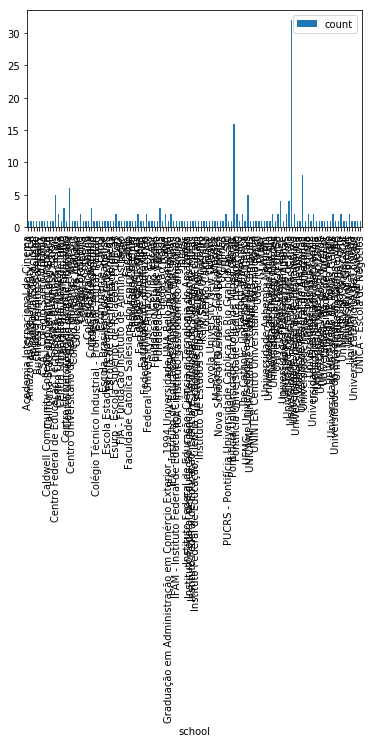

In [126]:
%matplotlib inline
totalPersonsPerSchool.plot(kind='bar')

In [127]:
totalPersonsPerDegree = eduDF.groupby('degree')['personId'].agg(['count'])
totalPersonsPerDegree

,count
degree,
2011,1
Administracao de Empresas,1
Administração em Comércio Exterior,1
Analise Google Analytics,1
Analise e Desenvolvimento de Sistemas,1
Analista de Sistemas,1
B.S. in Computer Science,1
Bacharel,6
Bacharel - Publicidade e Propaganda,1


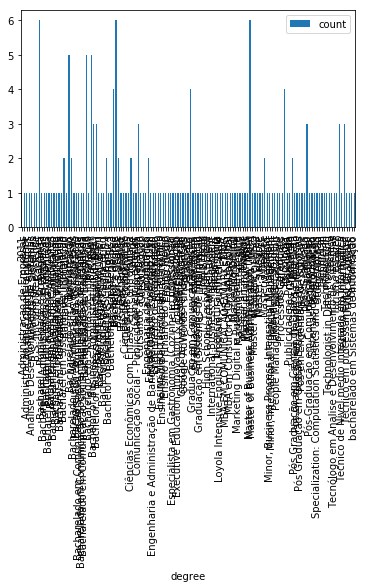

In [128]:
%matplotlib inline
totalPersonsPerDegree.plot(kind='bar')